Init

In [1414]:
%reload_ext autoreload
%autoreload 2
import sys
DATA_PATH = '../data/datasets/dataset_train.csv'

Retrieving data

In [1415]:
import numpy as np
arr = np.genfromtxt(DATA_PATH, delimiter=',', dtype=str)
try:
	arr = np.genfromtxt(DATA_PATH, delimiter=',', dtype=str)
	print('Successfuly retrieved the dataset', DATA_PATH)
except Exception as e:
	print(e)
	print(DATA_PATH, 'doesn\'t exists or isn\'t valid')
	raise KeyboardInterrupt()

Successfuly retrieved the dataset ../data/datasets/dataset_train.csv


Sorting revealant features

Preparing arrays

In [1416]:
nb_row, nb_col = arr.shape
dt = []
for i in range(0, nb_col):
	dt.append(arr[:,i])
name = []
for i in dt:
	name.append(i[0])
var = []
for i in dt:
	var.append(i[1:])
feat = []
for v in var[5:]:
	feat.append(v)

Calculating some stats

Sorting function

In [1417]:
def sortFloat(data):
	new = []
	buf = []
	buf[:] = [x for x in data if x]
	leng = len(buf)
	for i in range (leng):
		buf[i] = float(buf[i])
	for i in range (leng):
		for j in range(i + 1, leng):
			if(buf[i] > buf[j]):
				tmp = buf[i]
				buf[i] = buf[j]
				buf[j] = tmp
	return buf

In [1418]:
ordrd = []
for f in feat[1:]:
	ordrd.append(sortFloat(f))

Count

In [1419]:
count = []
for v in ordrd:
	count.append(len(v))
print (count)

[1566, 1568, 1567, 1569, 1561, 1565, 1565, 1557, 1566, 1570, 1560, 1600, 1600]


Mean (Hand)

In [1420]:
mean = []
avgHand = list(feat[0]).count('Left') / list(feat[0]).count('Right')
if avgHand > 1:
	mean.append('Left')
elif avgHand < 1:
	mean.append('Right')
else:
	mean.append('Balanced Left / Right')

Mean (Others)

In [1421]:
for v in ordrd:
	tmpMean = 0
	delta = 0
	for i in v:
		if i:
			tmpMean = tmpMean + float(i)
		else:
			delta = delta + 1
	tmpMean = tmpMean / (len(v) - delta)
	mean.append(tmpMean)
print(mean)

['Right', 49634.57024265645, 39.79713089016489, 1.1410195296768013, -0.3878634974417937, 3.1539096732863516, -224.5899148634642, 495.7479700591573, 2.9630946151165936, 1030.096946387132, 5.950372992780097, -0.05342713670049718, -243.37440901250008, 21.958012500000063]


Std

In [1422]:
std = []
std.append('N/A')
i = 1
delta = 0
for v in ordrd:
	variance = 0
	for x in v:
		if x:
			variance = variance + (float(x) - mean[i]) ** 2
		else:
			delta = delta + 1
	variance = variance / (len(v) - delta)
	std.append(variance ** 0.5)
	i = i + 1
print(std)

['N/A', 16674.47957652664, 520.1323297066417, 5.218016226138667, 5.21113225935, 4.153969710726385, 486.1894330848617, 106.25120223070017, 4.4243531771544795, 44.11102513805865, 3.146851589354909, 0.9711455533987503, 8.780894559533122, 97.60108742375692]


Min

In [1423]:
minc = []
minc.append('N/A')
for v in ordrd:
	if (v and len(v) > 1):
		minc.append(v[0])
	else:
		minc.append('N/A')
print(minc)

['N/A', -24370.0, -966.7405456412164, -10.295662748653244, -10.16211940387396, -8.727, -1086.4968348887983, 283.8696087336624, -8.858992991610515, 906.6273196915248, -4.697483767872527, -3.313675764124477, -261.04892, -181.47]


25%

In [1424]:
twf = []
twf.append('N/A')
for v in ordrd:
	if (v and len(v) > 4):
		place = len(v) * 0.25
		prc = v[int(place)] * (place % 1) + v[int(place +  1)] * (1 - place % 1)
		twf.append(prc)
	else:
		twf.append('N/A')
print(twf)

['N/A', 38513.0, -489.4875499344749, -4.310150036197523, -5.2477194896937185, 3.1005000000000003, -577.5764749355794, 397.53494331463673, 2.2224722602224496, 1026.2482725077145, 3.648670582440088, -0.6697441641071296, -250.64588999999998, -41.66]


50%

In [1425]:
fift = []
fift.append('N/A')
for v in ordrd:
	if (v and len(v) > 4):
		place = len(v) * 0.5
		prc = v[int(place)] * (place % 1) + v[int(place +  1)] * (1 - place % 1)
		fift.append(prc)
	else:
		fift.append('N/A')
print(fift)

['N/A', 49034.0, 261.84438377337773, 3.477659664856028, -2.581130317446064, 4.624499999999999, -418.9126436257238, 464.12295170868344, 4.378896990603996, 1045.5443033349936, 5.8857893627957845, -0.043272224128663606, -244.86731, -2.45]


75%

In [1426]:
sevf = []
sevf.append('N/A')
for v in ordrd:
	if (v and len(v) > 4):
		place = len(v) * 0.75
		prc = v[int(place)] * (place % 1) + v[int(place +  1)] * (1 - place % 1)
		sevf.append(prc)
	else:
		sevf.append('N/A')
print(sevf)

['N/A', 60873.0, 526.3325363743589, 5.4226367055781015, 4.90521498350803, 5.667250000000001, 255.9405241562739, 597.5451631939261, 5.827985498665873, 1058.4654013854035, 8.251549798774938, 0.5959131365739575, -232.53193, 51.47]


Max

In [1427]:
maxc = []
maxc.append('N/A')
for v in ordrd:
	if (v and len(v) > 1):
		maxc.append(v[-1])
	else:
		maxc.append('N/A')
print(maxc)

['N/A', 104956.0, 1016.2119403873959, 11.612895082210851, 9.667405456412162, 10.032, 1092.3886105728684, 745.3962198761234, 11.889712754042707, 1098.9582005409077, 13.536762124994421, 3.0565457738978123, -225.42813999999998, 279.07]


Data Visualization

Histogram : `Which Hogwarts course has a homogeneous score distribution between all four houses?'

In [1428]:
def normalize(nb):
	minr = float(nb[0])
	maxr = float(nb[-1])
	norm = []
	for r in nb:
		norm.append((float(r) - minr) / (maxr - minr))
	return norm

nrm = []
for i in ordrd[1:]:
	nrm.append(normalize(i))

Data repartition


ValueError: Unrecognized location 'upper_right'. Valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center


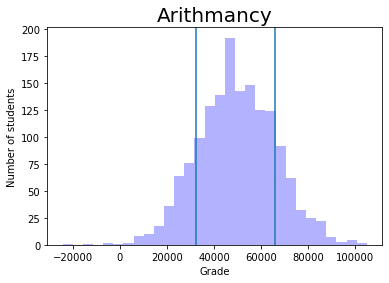

In [1429]:
import matplotlib.pyplot as plt

color = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan', 'lime', 'crimson', 'magenta']

print('Data repartition')
i = 0
for h in ordrd:
	plt.title(name[6 + i], fontsize=20)
	plt.xlabel("Grade")
	plt.ylabel("Number of students")
	plt.hist(h,
	facecolor=color[i],
	bins=30,
	alpha=0.3)
	plt.axvline(x=float(fift[1 + i] + std[1+i]), label='med +/- std')
	plt.axvline(x=float(fift[1 + i] - std[1+i]))
	plt.legend(loc='upper right')
	i = i + 1
	plt.show()


Scatter plot : `What are the two features that are similar ?'